In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/dengue_features_train.csv')
df2 = pd.read_csv('/content/dengue_labels_train.csv')

In [ ]:
df1

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                               32.00                             73.365714   
1                               17.94                             77.368571   
2                               26.10                             82.052857   
3                               13.90                             80.337143   
4                               12.20                             80.460000   
...                               ...                                   ...   
1451                            45.00                             88.765714   
1452                           207.10                             91.600000   
1453                            50.60                             94.280000   
1454                            62.33                             94.660000   
1455                            36.90                             89.082857   

      reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                            12.42                              14.012857   
1                            22.82                              15.372857   
2                            34.54                              16.848571   
3                            15.36                              16.672857   
4                             7.52                              17.210000   
...                            ...                                    ...   
1451                         55.30                              18.485714   
1452                         86.47                              18.070000   
1453                         58.94                              17.008571   
1454                         59.67                              16.815714   
1455                         63.22                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286      

In [ ]:
df2


city  year  weekofyear  total_cases
0      sj  1990          18            4
1      sj  1990          19            5
2      sj  1990          20            4
3      sj  1990          21            3
4      sj  1990          22            6
...   ...   ...         ...          ...
1451   iq  2010          21            5
1452   iq  2010          22            8
1453   iq  2010          23            1
1454   iq  2010          24            1
1455   iq  2010          25            4

[1456 rows x 4 columns]

# Data preprocessing and eda

In [ ]:
df_dengue_train = pd.merge(df1, df2, on=['city', 'year','weekofyear'], how='inner')

In [ ]:
df_dengue_train

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                73.365714                         12.42   
1                                77.368571                         22.82   
2                                82.052857                         34.54   
3                                80.337143                         15.36   
4                                80.460000                          7.52   
...                                    ...                           ...   
1451                             88.765714                         55.30   
1452                             91.600000                         86.47   
1453                             94.280000                         58.94   
1454                             94.660000                         59.67   
1455                             89.082857                         63.22   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                                 14.012857           2.628571   
1                                 15.372857           2.371429   
2                                 16.848571           2.300000   
3                                 16.672857           2.428571   
4                                 17.210000           3.014286   
...                                     ...                ...   
1451                              18.485714           9.800000   
1452                              18.070000           7.471429   
1453                              17.008571           7.500000   
1454                              16.815714           7.871429   
1455                              17.355714          11.014286   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0              25.442857                 6.900000                29.4   
1              26.714286                 6.371429                31.7   
2              26.714286                 6.485714                32.2   
3              27.471429                 6.771429                33.3   
4              28.942857                 9.371429                35.0   
...                  ...                      ...                 ...   
1451           28.633333                11.933

In [ ]:
df_dengue_train.columns


Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [ ]:
df_dengue_train.describe()

year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714   
25%       0.144209              9.800000             297.658929   
50%       0.189450             38.340000             298.646429   
75%       0.246982             70.235000             299.833571   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
count            1446.000000                  1446.000000  ...   
mean              299.225578                   295.246356  ...   
std                 1.261715                     1.527810  ...   
min               294.892857                   289.642857  ...   
25%               298.257143                   294.118929  ...   
50%               299.289286                   295.640714  ...   
75%               300.207143                   296.460000  ...   
max               302.928571                   298.450000  ...   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                           1446.000000                   1443.000000   
mean                              82.161959                     45.760388   
std                                7.153897                     43.715537   
min                               57.787143                      0.000000   
25%                               77.177143                      9.800000   
50%                               80.301429                     38.340000   
75%                               86.357857                     70.235000   
max                               98.610000                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                            1446.000000        1446.000000   
mean                               16.746427           4.903754   
std                                 1.542494           3.546445   
min                                11.715714           1.357143   
25%                                15.557143           2.328571   
50%                                17.087143           2.857143   
75%                                17.978214           7.625000   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1413.000000              1413.000000         1436.000000   
mean            27.185783                 8.059328           32.452437   
std              1.292347                 2.128568            1.959318   
min             21.400000                 4.528571           26.700000   
25%             26.300000                 6.514286           31.100000   
50%             27.414286                 7.300000           32.800000   
75%             28.157143                 9.566667           33.900000   
max             30.800000                15.800000           42.200000   

       station_min_temp_c  station_precip_mm  total_cases  
count         1442.000000        1434.000000  1456.000000  
mean            22.102150          39.326360    24.675137  
std

In [ ]:
df_dengue_train.groupby(['city'])['total_cases'].mean()

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [ ]:
df_dengue_train.describe(include='object')

city week_start_date
count   1456            1456
unique     2            1049
top       sj      2005-06-18
freq     936               2

Checking number of numerical features and categorical features in the data set

In [ ]:
df_dengue_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

checking unique values in categorical variables to see if there are errorenous values

In [ ]:
df_dengue_train_object_unique = df_dengue_train.select_dtypes(exclude=['int', 'float'])
for col in df_dengue_train_object_unique .columns:
    print(df_dengue_train_object_unique [col].unique())



['sj' 'iq']
['1990-04-30' '1990-05-07' '1990-05-14' ... '2010-06-11' '2010-06-18'
 '2010-06-25']


Checks Duplicate values in rows on all of the clomuns, tunrs out zero rows have duplicate values

In [ ]:
df_dengue_train[df_dengue_train.duplicated(keep=False)]

Empty DataFrame
Columns: [city, year, weekofyear, week_start_date, ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw, precipitation_amt_mm, reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, station_precip_mm, total_cases]
Index: []

[0 rows x 25 columns]

##Check missing data(NaN)

In [ ]:
df_dengue_train[df_dengue_train.isna().any(axis=1)]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
13     sj  1990          31      1990-07-30       NaN  0.247150  0.379700   
14     sj  1990          32      1990-08-06       NaN  0.064333  0.164443   
15     sj  1990          33      1990-08-13       NaN  0.128033  0.206957   
...   ...   ...         ...             ...       ...       ...       ...   
1400   iq  2009          23      2009-06-04  0.114000  0.092443  0.097471   
1409   iq  2009          32      2009-08-06  0.395000  0.352733  0.484286   
1430   iq  2010          53      2010-01-01       NaN       NaN       NaN   
1431   iq  2010           1      2010-01-08  0.124571  0.179129  0.163843   
1444   iq  2010          14      2010-04-09  0.242843  0.272757  0.202271   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
5     0.181743                  9.58             299.630000  ...   
9     0.202567                 14.41             300.154286  ...   
13    0.381357                 32.66             299.862857  ...   
14    0.138857                 28.80             300.391429  ...   
15    0.168243                 90.75             299.958571  ...   
...        ...                   ...                    ...  ...   
1400  0.126286                 42.22             296.125714  ...   
1409  0.401914                  9.79             297.370000  ...   
1430       NaN                   NaN                    NaN  ...   
1431  0.135471                 27.04             299.264286  ...   
1444  0.260114                 93.76             299.115714  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
5                                79.891429                          9.58   
9                                81.281429                         14.41   
13                               80.584286                         32.66   
14                               79.650000                         28.80   
15                               84.178571                         90.75   
...                                    ...                           ...   
1400                             95.507143                         42.22   
1409                             87.811429                          9.79   
1430                                   NaN                           NaN   
1431                             78.271429                         27.04   
1444                             95.182857                         93.76   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
5                                 17.212857           2.100000   
9                                 18.071429           2.014286   
13                                17.594286           2.585714   
14                                17.950000           2.328571   
15                                18.515714           1.857143   
...                                     ...                ...   
1400                              16.757143           6.071429   
1409                              16.337143          11.757143   
1430                                    NaN                NaN   
1431                              16.127143          11.100000   
1444                              20.078571           7.714286   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
5              28.114286                 6.942857                34.4   
9              28.328571                 6.514286                33.9   
13             28.242857                 8.085714                34.4   
14             28.200000                 7.557143                33.3   
15             28.042857                 6.685714                32.8   
...                  ...                      ...                 ...   
1400           28.100000                11.800

visualising missing values for each column

<Axes: >

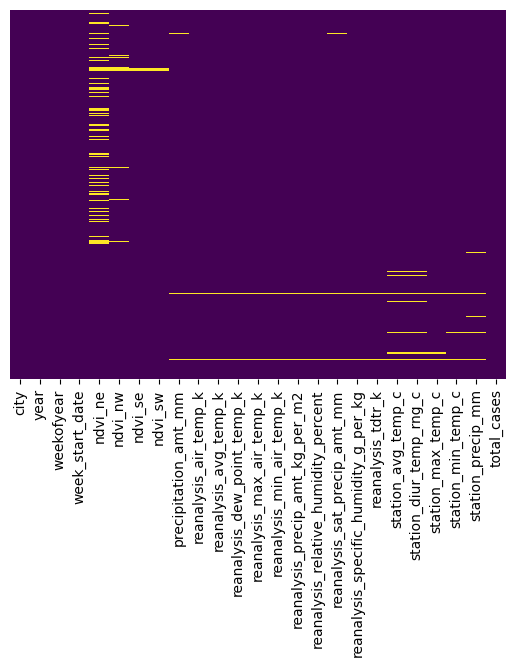

In [ ]:
sns.heatmap(df_dengue_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

checking percentage of missing values for each feature/column

In [ ]:
df_dengue_train.isnull().sum()/df_dengue_train.shape[0]*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c             

In [ ]:
print(df_dengue_train[df_dengue_train.isna()].any(axis=1).shape)
df_dengue_train[df_dengue_train.isna().any(axis=1)]



(1456,)


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
13     sj  1990          31      1990-07-30       NaN  0.247150  0.379700   
14     sj  1990          32      1990-08-06       NaN  0.064333  0.164443   
15     sj  1990          33      1990-08-13       NaN  0.128033  0.206957   
...   ...   ...         ...             ...       ...       ...       ...   
1400   iq  2009          23      2009-06-04  0.114000  0.092443  0.097471   
1409   iq  2009          32      2009-08-06  0.395000  0.352733  0.484286   
1430   iq  2010          53      2010-01-01       NaN       NaN       NaN   
1431   iq  2010           1      2010-01-08  0.124571  0.179129  0.163843   
1444   iq  2010          14      2010-04-09  0.242843  0.272757  0.202271   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
5     0.181743                  9.58             299.630000  ...   
9     0.202567                 14.41             300.154286  ...   
13    0.381357                 32.66             299.862857  ...   
14    0.138857                 28.80             300.391429  ...   
15    0.168243                 90.75             299.958571  ...   
...        ...                   ...                    ...  ...   
1400  0.126286                 42.22             296.125714  ...   
1409  0.401914                  9.79             297.370000  ...   
1430       NaN                   NaN                    NaN  ...   
1431  0.135471                 27.04             299.264286  ...   
1444  0.260114                 93.76             299.115714  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
5                                79.891429                          9.58   
9                                81.281429                         14.41   
13                               80.584286                         32.66   
14                               79.650000                         28.80   
15                               84.178571                         90.75   
...                                    ...                           ...   
1400                             95.507143                         42.22   
1409                             87.811429                          9.79   
1430                                   NaN                           NaN   
1431                             78.271429                         27.04   
1444                             95.182857                         93.76   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
5                                 17.212857           2.100000   
9                                 18.071429           2.014286   
13                                17.594286           2.585714   
14                                17.950000           2.328571   
15                                18.515714           1.857143   
...                                     ...                ...   
1400                              16.757143           6.071429   
1409                              16.337143          11.757143   
1430                                    NaN                NaN   
1431                              16.127143          11.100000   
1444                              20.078571           7.714286   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
5              28.114286                 6.942857                34.4   
9              28.328571                 6.514286                33.9   
13             28.242857                 8.085714                34.4   
14             28.200000                 7.557143                33.3   
15             28.042857                 6.685714                32.8   
...                  ...                      ...                 ...   
1400           28.100000                11.800

# Checking for outliers for each feature

In [ ]:
df_dengue_train.loc[:,df_dengue_train.columns[4:8]].boxplot()
print(df_dengue_train.columns[4:8])


Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], dtype='object')


<Axes: >

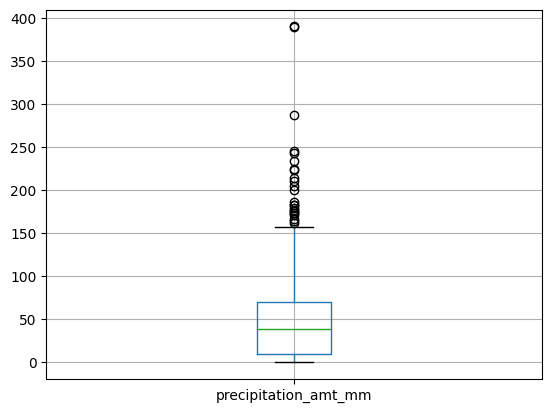

In [ ]:
df_dengue_train.loc[:,df_dengue_train.columns[8:9]].boxplot()

Index(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k'],
      dtype='object')


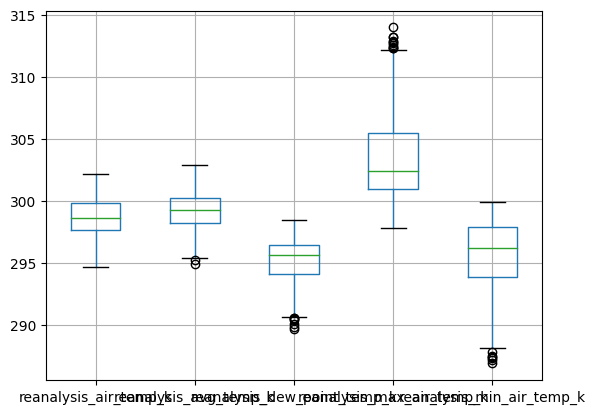

In [ ]:
df_dengue_train.loc[:,df_dengue_train.columns[9:14]].boxplot()

print(df_dengue_train.columns[9:14])

Index(['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k'],
      dtype='object')


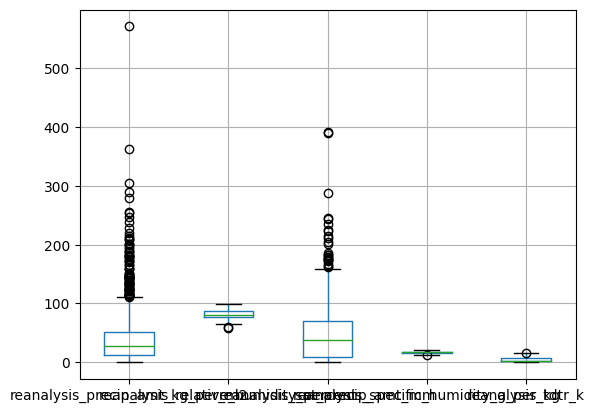

In [ ]:
df_dengue_train.loc[:,df_dengue_train.columns[14:19]].boxplot()
print(df_dengue_train.columns[14:19])

Index(['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c'],
      dtype='object')


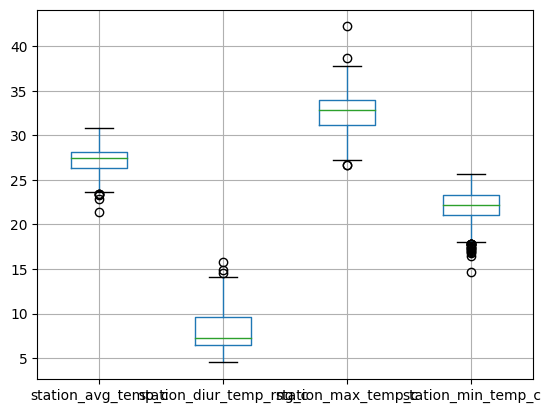

In [ ]:
df_dengue_train.loc[:,df_dengue_train.columns[19:23]].boxplot()
print(df_dengue_train.columns[19:23])

In [ ]:
df_dengue_train.loc[:,df_dengue_train.columns[23:]].boxplot()
print(df_dengue_train.columns[23:])

Index(['station_precip_mm', 'total_cases'], dtype='object')


checking for outliers in the categorical variable city, against the target variable total cases

In [ ]:
sns.boxplot(x="city", y="total_cases", data=df_dengue_train)

<Axes: xlabel='city', ylabel='total_cases'>

Outliers appear in

1.  ndvi_nw
2.  precipitation_amt_mm
3. reanalysis_precip_amt_kg_per_m2
4. reanalysis_sat_precip_amt_mm
5. station_precip_mm

In [ ]:
ndvi_nw_max_index = df_dengue_train['ndvi_nw'].idxmax()
precipitation_amt_mm_max_index = df_dengue_train['precipitation_amt_mm'].idxmax()
reanalysis_precip_amt_kg_per_m2_max_index = df_dengue_train['reanalysis_precip_amt_kg_per_m2'].idxmax()
reanalysis_sat_precip_amt_mm_max_index = df_dengue_train['reanalysis_sat_precip_amt_mm'].idxmax()
station_precip_mm_max_index = df_dengue_train['station_precip_mm'].idxmax()

outliers_index = []
outliers_index.append(ndvi_nw_max_index)
outliers_index.append(precipitation_amt_mm_max_index)
outliers_index.append(reanalysis_precip_amt_kg_per_m2_max_index)
outliers_index.append(reanalysis_sat_precip_amt_mm_max_index)
outliers_index.append(station_precip_mm_max_index)

In [ ]:
for i in outliers_index:
  print(df_dengue_train.loc[i])
  print(df2.loc[i])
  print("===============")

city                                             iq
year                                           2009
weekofyear                                       36
week_start_date                          2009-09-03
ndvi_ne                                    0.508357
ndvi_nw                                    0.454429
ndvi_se                                    0.538314
ndvi_sw                                    0.514829
precipitation_amt_mm                          83.02
reanalysis_air_temp_k                    297.388571
reanalysis_avg_temp_k                        298.45
reanalysis_dew_point_temp_k              296.388571
reanalysis_max_air_temp_k                     305.0
reanalysis_min_air_temp_k                     293.5
reanalysis_precip_amt_kg_per_m2               78.37
reanalysis_relative_humidity_percent      94.992857
reanalysis_sat_precip_amt_mm                  83.02
reanalysis_specific_humidity_g_per_kg     17.988571
reanalysis_tdtr_k                          7.642857
station_avg_

###Not sure weather the outlier is the factor to influence total cases or not, so I don't eliminate it.

# EDA exploring feature distribution and correlation against target varaible

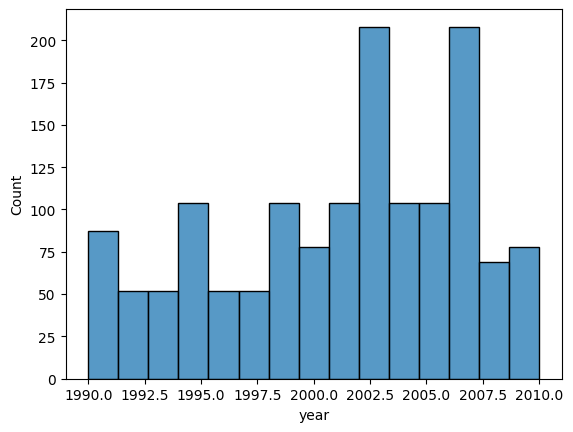

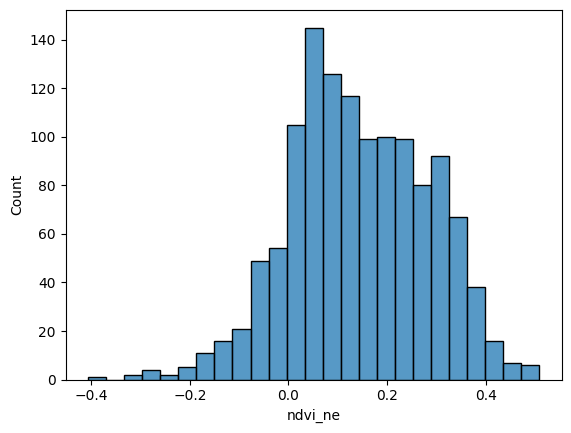

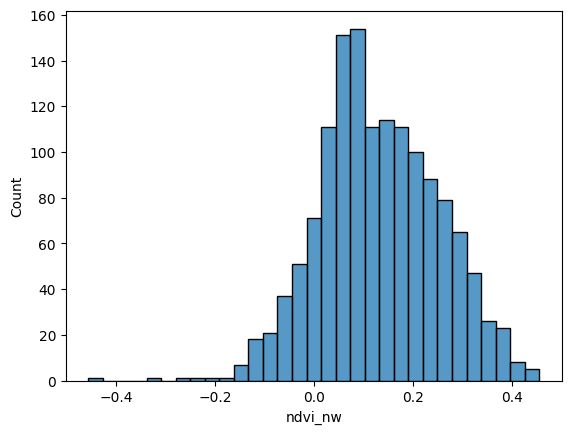

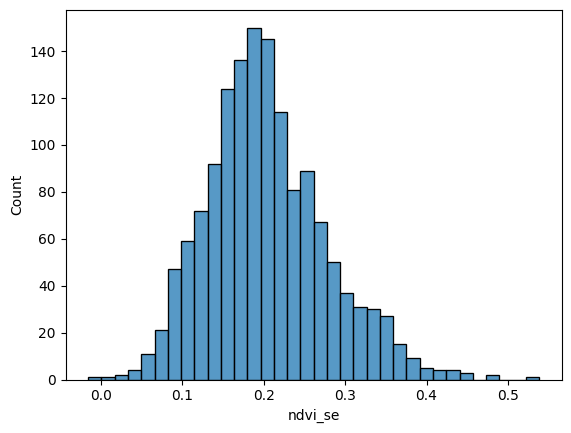

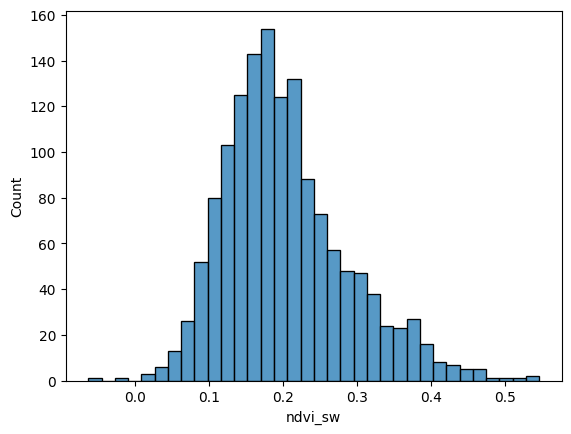

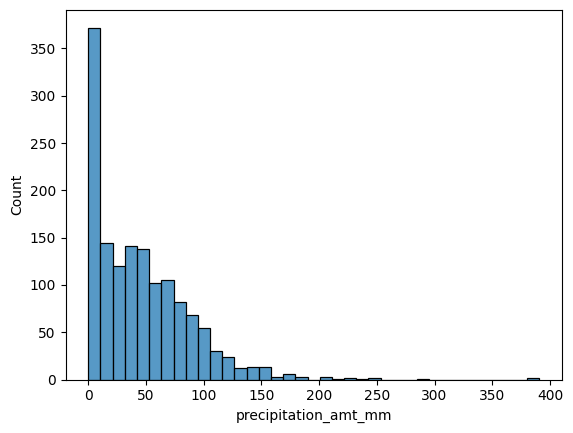

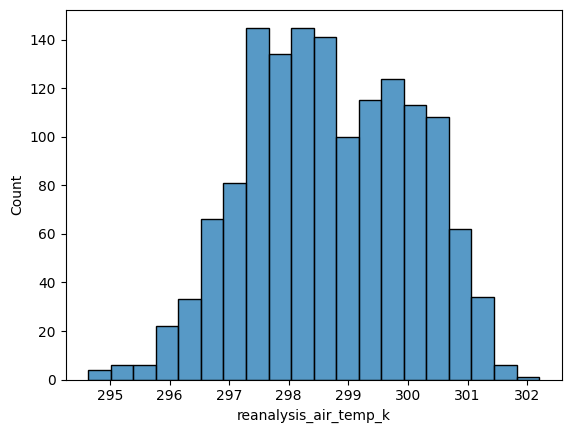

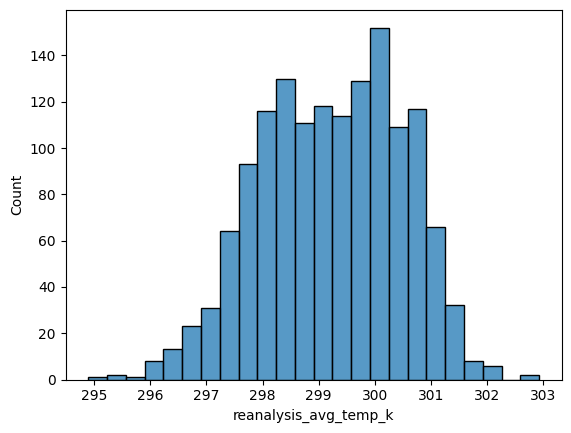

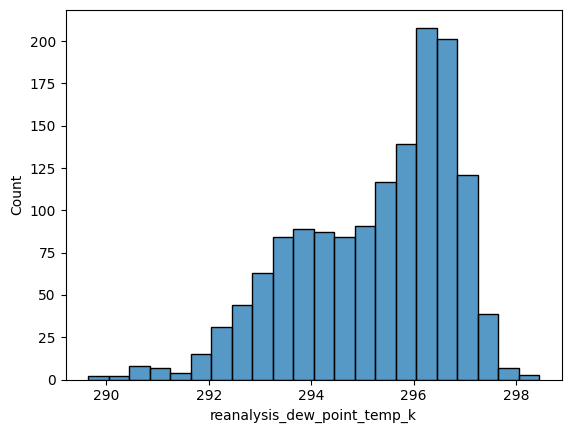

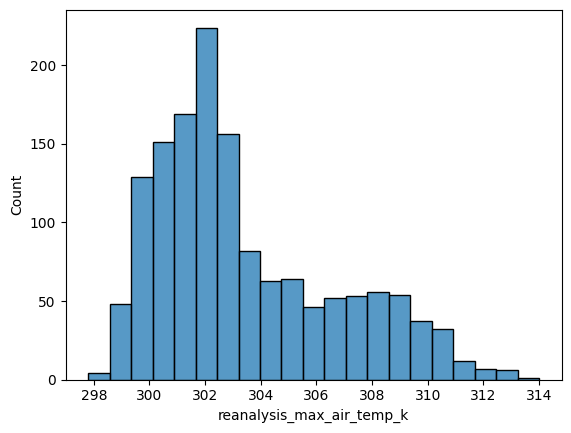

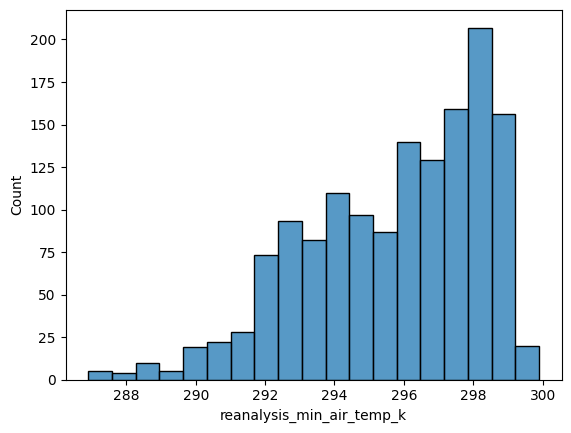

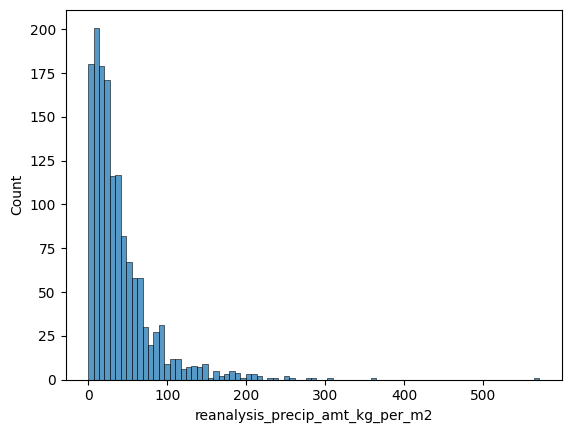

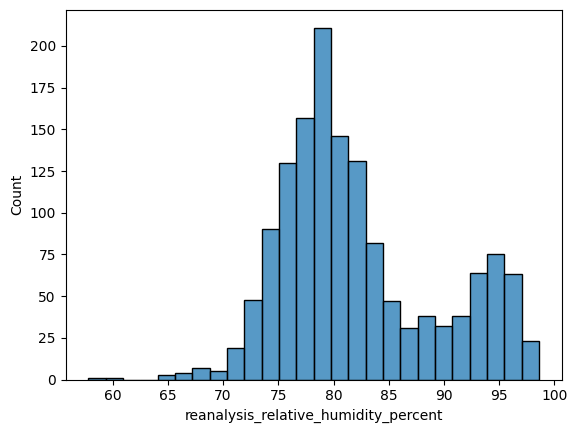

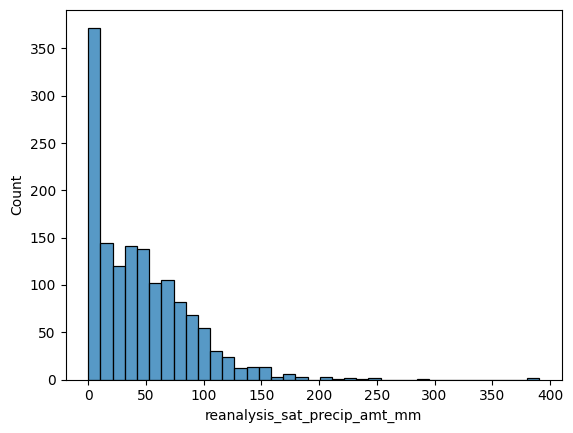

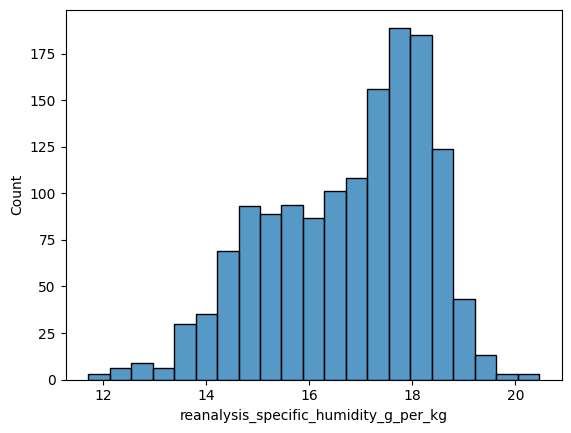

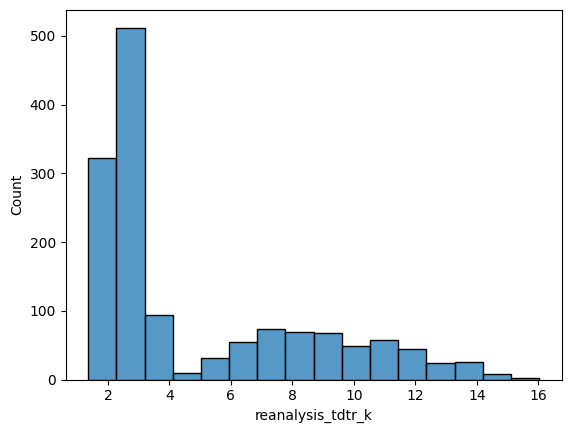

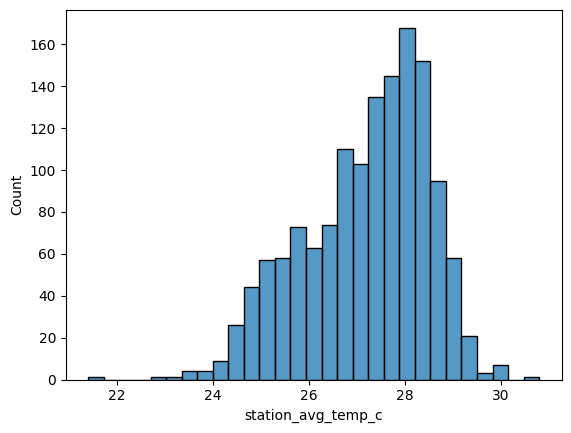

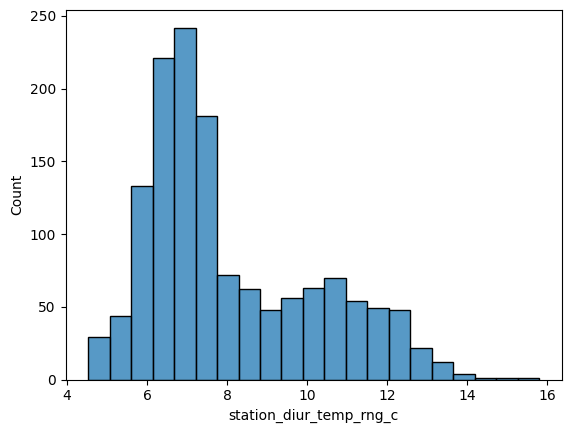

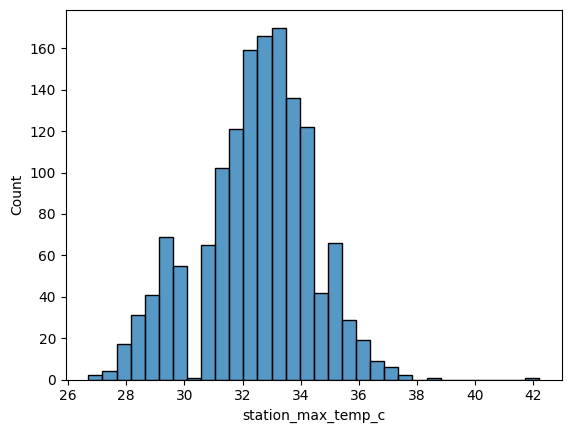

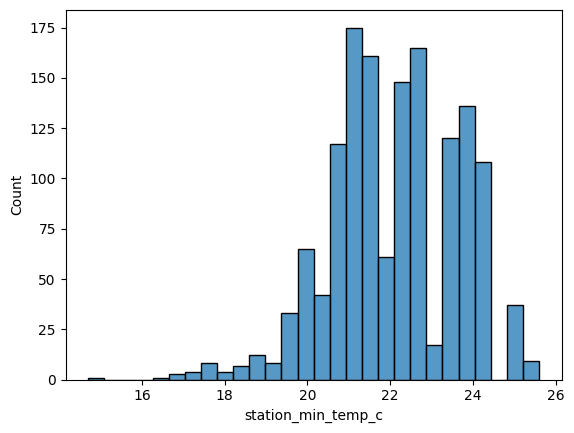

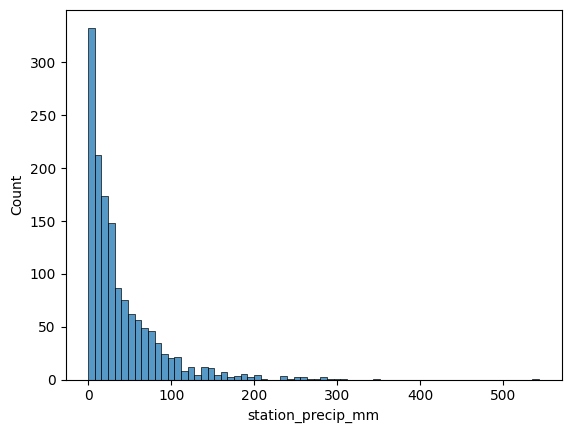

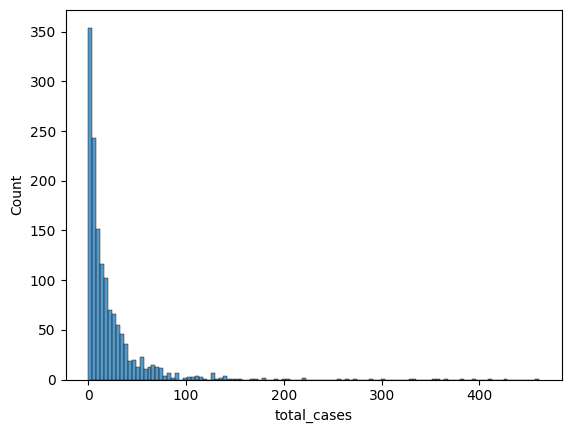

In [ ]:
#histograms to understand distribuiton of data

for i in df_dengue_train.select_dtypes(include='number').columns:
  sns.histplot(data=df_dengue_train, x=i)
  plt.show()

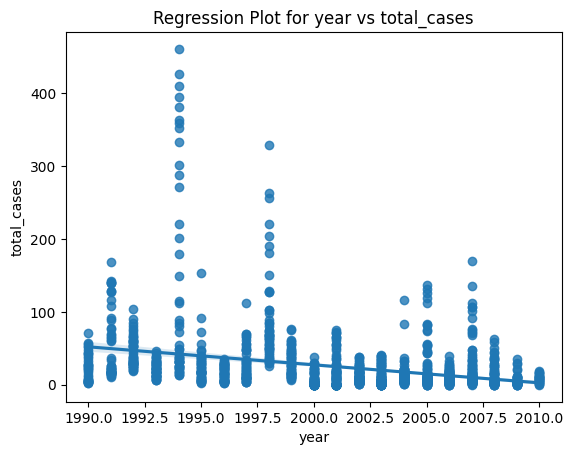

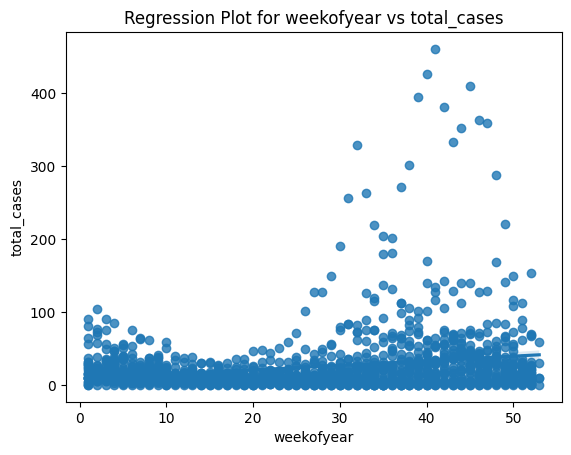

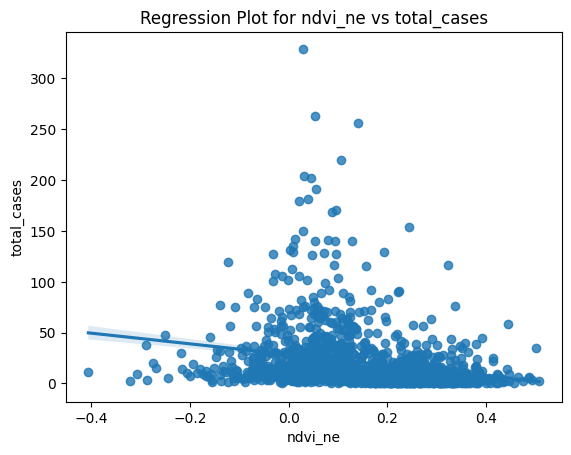

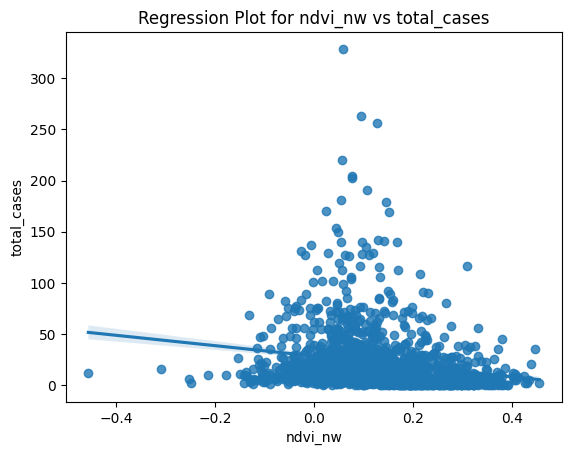

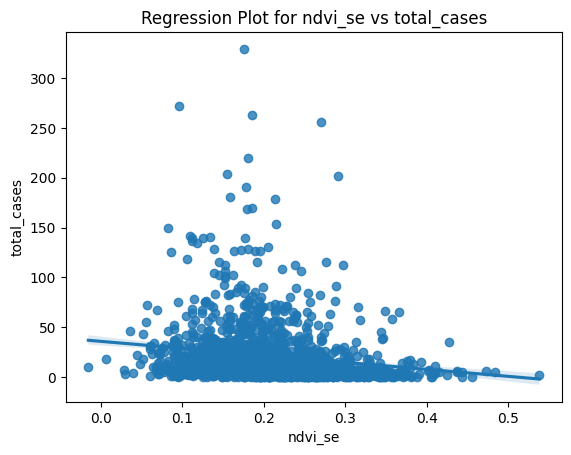

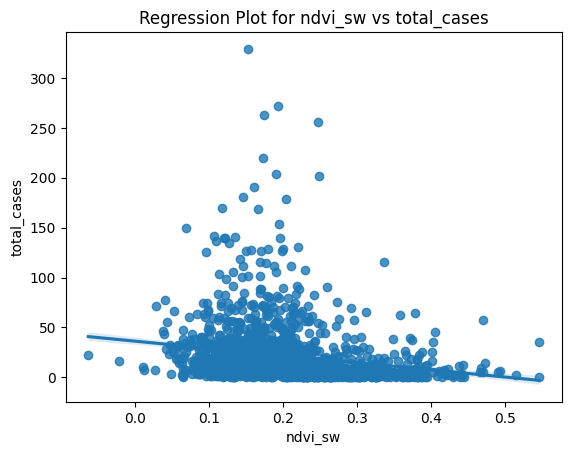

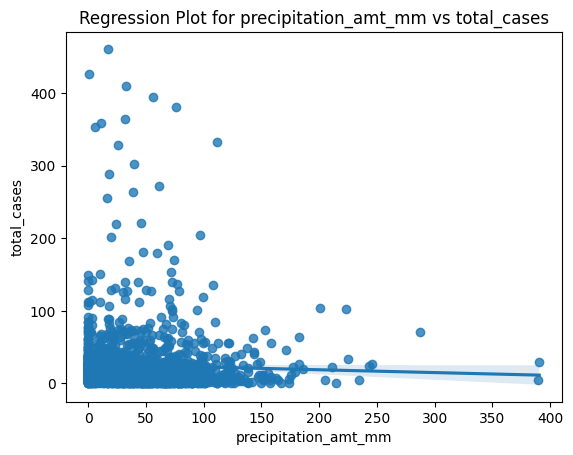

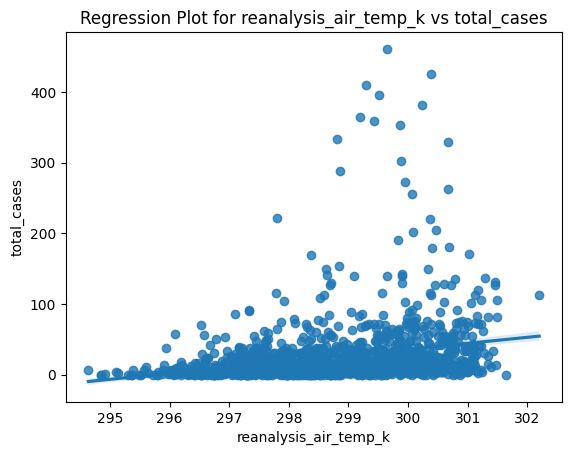

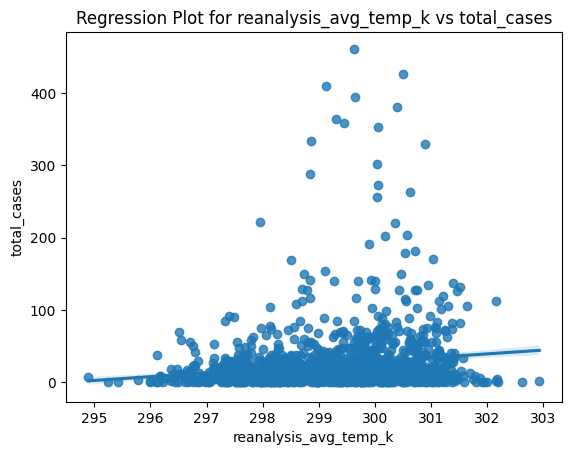

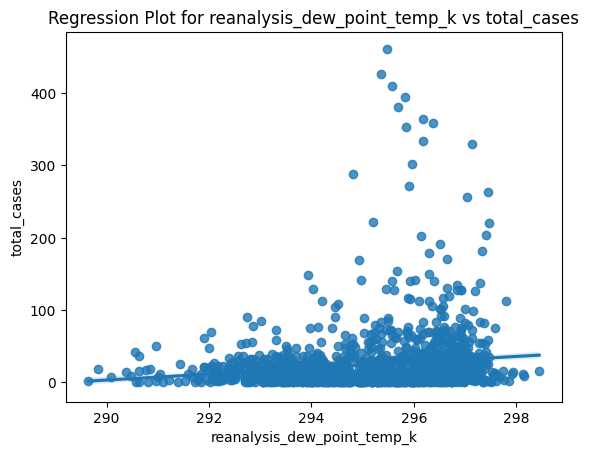

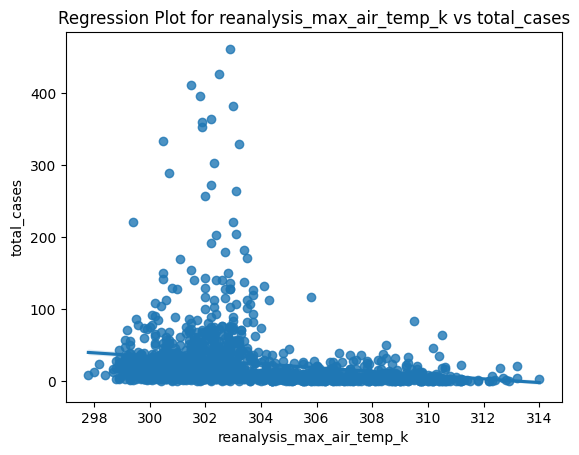

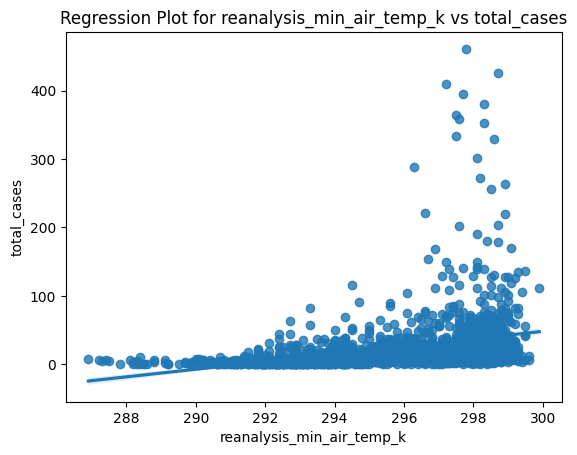

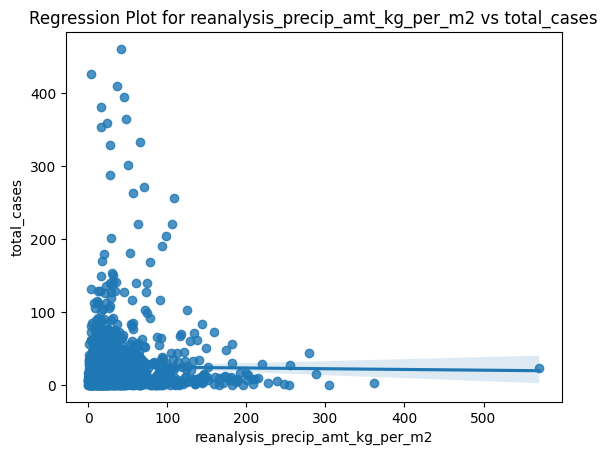

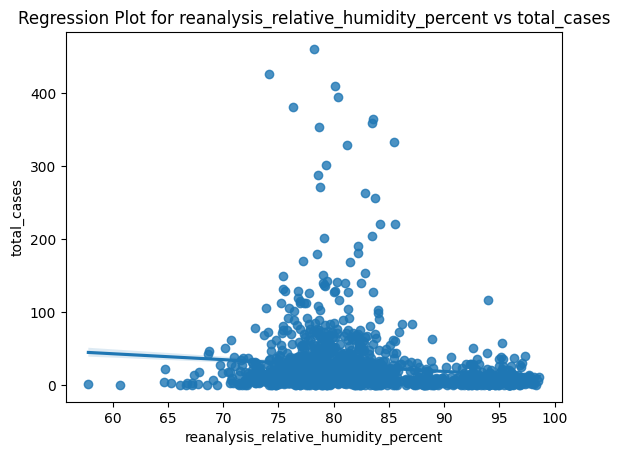

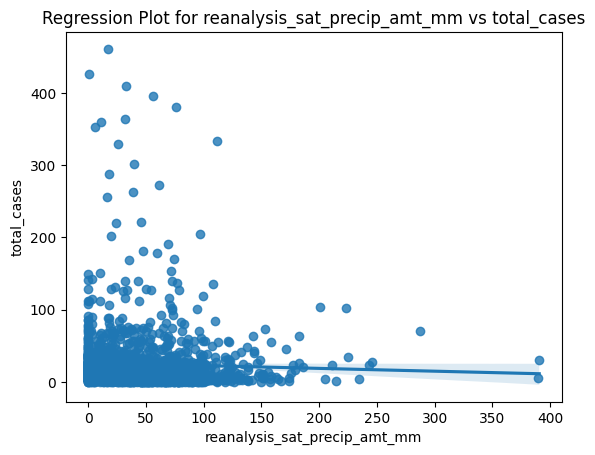

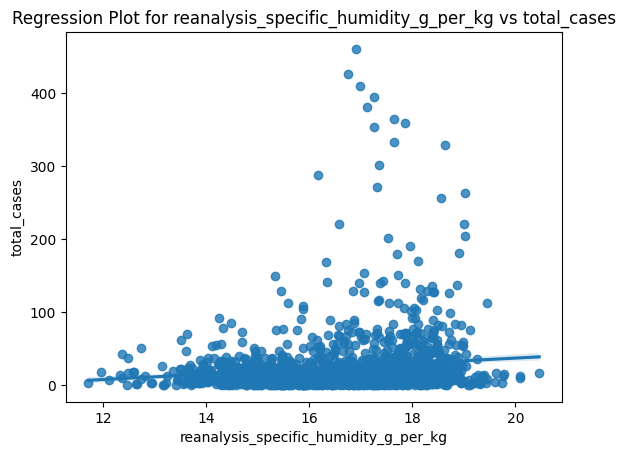

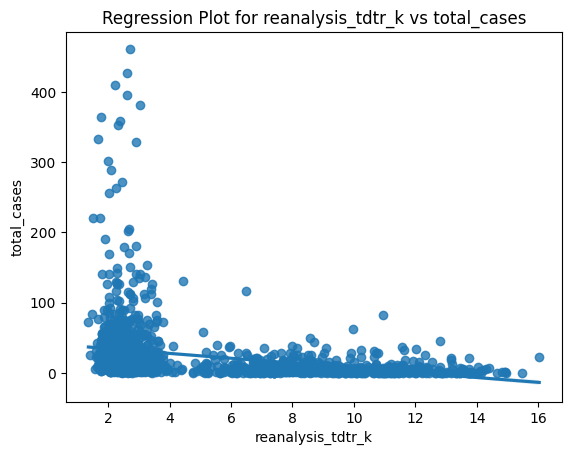

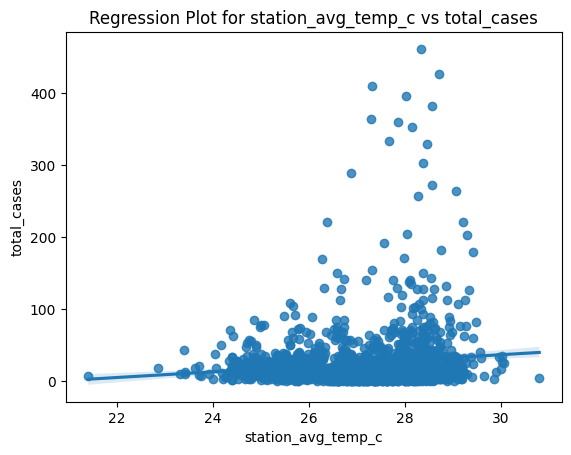

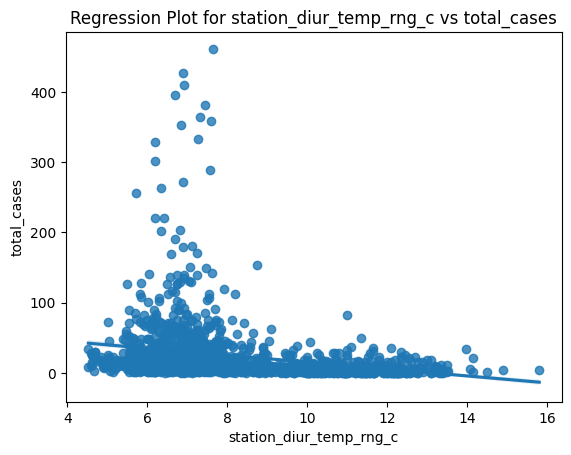

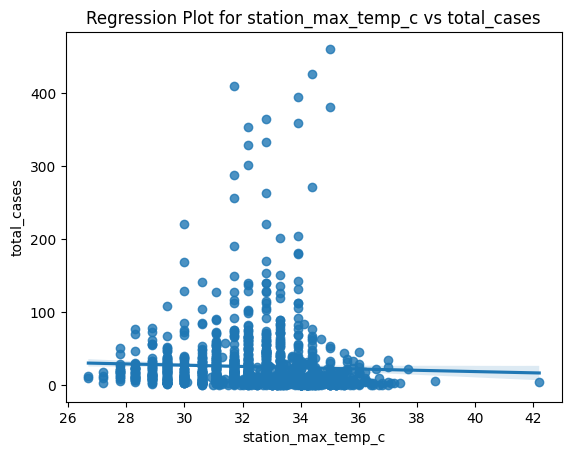

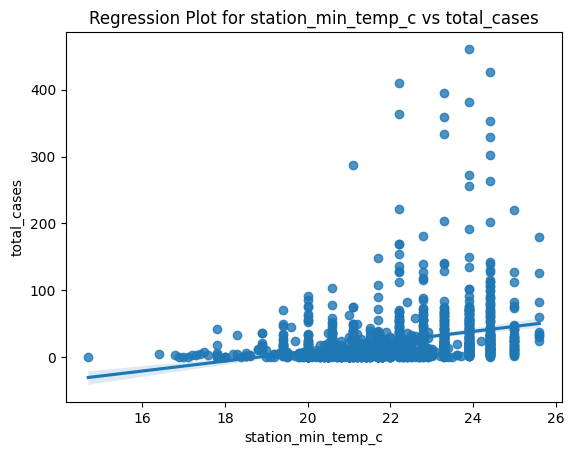

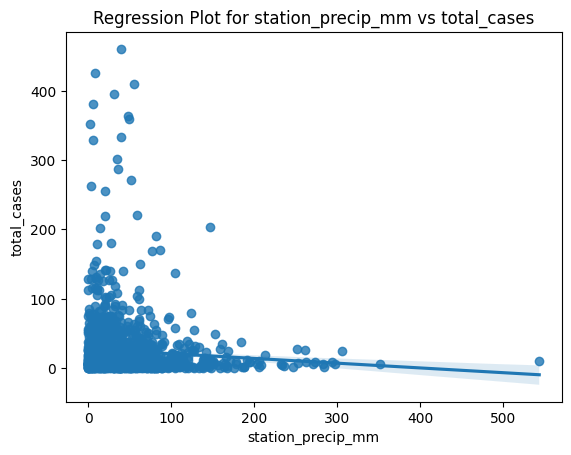

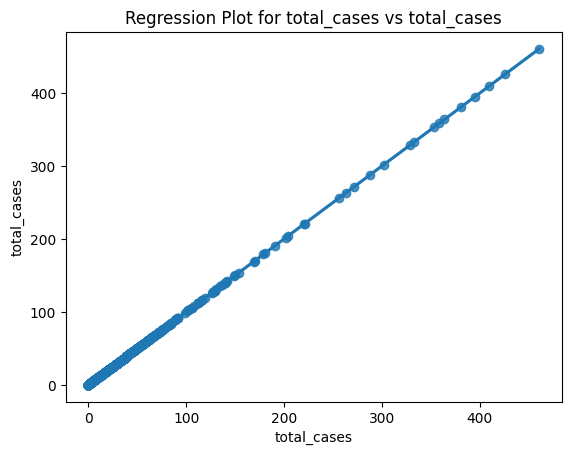

In [ ]:



numerical_columns = df_dengue_train.select_dtypes(include=['float64', 'int64']).columns


for column in numerical_columns:
    sns.regplot(x=column, y="total_cases", data=df_dengue_train)
    plt.xlabel(column)
    plt.ylabel('total_cases')
    plt.title(f'Regression Plot for {column} vs total_cases')
    plt.show()


## Categorical variable eda

<Axes: xlabel='city', ylabel='total_cases'>

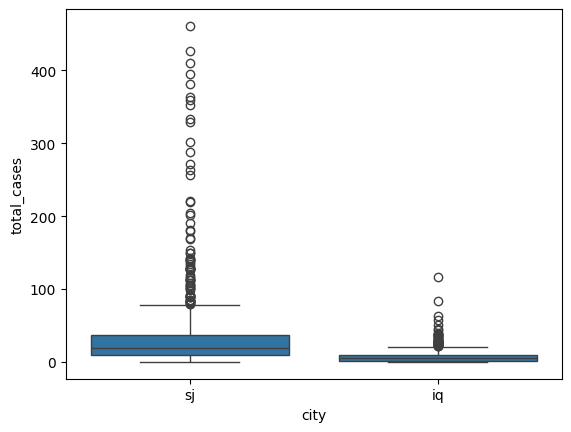

In [ ]:
sns.boxplot(x="city", y="total_cases", data=df_dengue_train)

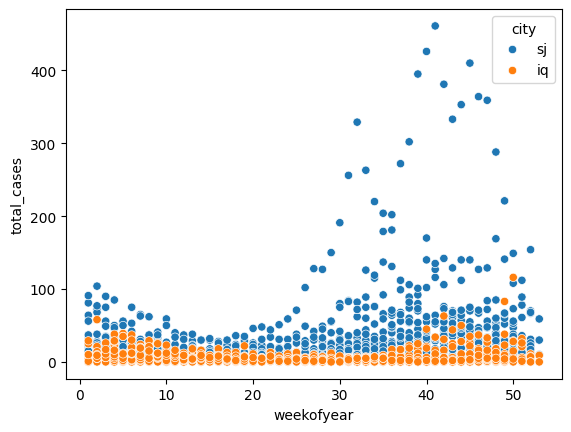

In [ ]:
sns.scatterplot(data=df_dengue_train, x='weekofyear', y='total_cases', hue='city')
plt.show()

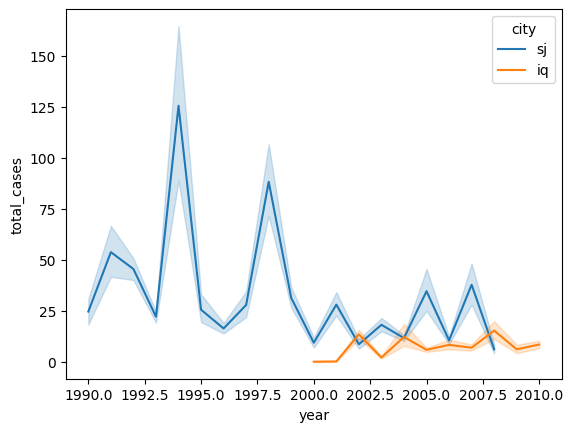

In [ ]:
sns.lineplot(data=df_dengue_train, x='year', y='total_cases', hue='city')
plt.show()

handling missing valeus ||| most of the rows have at least four non-NaN columns( city, year, weekofyear, week_start_date), but missing some values on other columns. Therefore, I choose 10 as threhold.

In [ ]:
df_dengue_train = df_dengue_train.dropna(thresh=10).copy()  # rows required at least 10 non-NaN
df_dengue_train[df_dengue_train.isna().any(axis=1)]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
13     sj  1990          31      1990-07-30       NaN  0.247150  0.379700   
14     sj  1990          32      1990-08-06       NaN  0.064333  0.164443   
15     sj  1990          33      1990-08-13       NaN  0.128033  0.206957   
...   ...   ...         ...             ...       ...       ...       ...   
1365   iq  2008          40      2008-09-30  0.393086  0.378271  0.343700   
1400   iq  2009          23      2009-06-04  0.114000  0.092443  0.097471   
1409   iq  2009          32      2009-08-06  0.395000  0.352733  0.484286   
1431   iq  2010           1      2010-01-08  0.124571  0.179129  0.163843   
1444   iq  2010          14      2010-04-09  0.242843  0.272757  0.202271   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
5     0.181743                  9.58             299.630000  ...   
9     0.202567                 14.41             300.154286  ...   
13    0.381357                 32.66             299.862857  ...   
14    0.138857                 28.80             300.391429  ...   
15    0.168243                 90.75             299.958571  ...   
...        ...                   ...                    ...  ...   
1365  0.404843                 24.28             299.178571  ...   
1400  0.126286                 42.22             296.125714  ...   
1409  0.401914                  9.79             297.370000  ...   
1431  0.135471                 27.04             299.264286  ...   
1444  0.260114                 93.76             299.115714  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
5                                79.891429                          9.58   
9                                81.281429                         14.41   
13                               80.584286                         32.66   
14                               79.650000                         28.80   
15                               84.178571                         90.75   
...                                    ...                           ...   
1365                             79.502857                         24.28   
1400                             95.507143                         42.22   
1409                             87.811429                          9.79   
1431                             78.271429                         27.04   
1444                             95.182857                         93.76   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
5                                 17.212857           2.100000   
9                                 18.071429           2.014286   
13                                17.594286           2.585714   
14                                17.950000           2.328571   
15                                18.515714           1.857143   
...                                     ...                ...   
1365                              16.331429          12.785714   
1400                              16.757143           6.071429   
1409                              16.337143          11.757143   
1431                              16.127143          11.100000   
1444                              20.078571           7.714286   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
5              28.114286                 6.942857                34.4   
9              28.328571                 6.514286                33.9   
13             28.242857                 8.085714                34.4   
14             28.200000                 7.557143                33.3   
15             28.042857                 6.685714                32.8   
...                  ...                      ...                 ...   
1365                 NaN                      

In [ ]:
df_dengue_train['timestamp'] = pd.to_datetime(df_dengue_train['week_start_date'])
df_dengue_train.set_index('timestamp', inplace=True)

# Apply time-based interpolation
df_interpolated = df_dengue_train.interpolate(method='time')

# Display interpolated DataFrame
print("Interpolated DataFrame:")
df_interpolated.head()

Interpolated DataFrame:


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw  \
timestamp                                                               
1990-04-30   sj  1990          18      1990-04-30  0.122600  0.103725   
1990-05-07   sj  1990          19      1990-05-07  0.169900  0.142175   
1990-05-14   sj  1990          20      1990-05-14  0.032250  0.172967   
1990-05-21   sj  1990          21      1990-05-21  0.128633  0.245067   
1990-05-28   sj  1990          22      1990-05-28  0.196200  0.262200   

             ndvi_se   ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
timestamp                                                                     
1990-04-30  0.198483  0.177617                 12.42             297.572857   
1990-05-07  0.162357  0.155486                 22.82             298.211429   
1990-05-14  0.157200  0.170843                 34.54             298.781429   
1990-05-21  0.227557  0.235886                 15.36             298.987143   
1990-05-28  0.251200  0.247340                  7.52             299.518571   

            ...  reanalysis_relative_humidity_percent  \
timestamp   ...                                         
1990-04-30  ...                             73.365714   
1990-05-07  ...                             77.368571   
1990-05-14  ...                             82.052857   
1990-05-21  ...                             80.337143   
1990-05-28  ...                             80.460000   

            reanalysis_sat_precip_amt_mm  \
timestamp                                  
1990-04-30                         12.42   
1990-05-07                         22.82   
1990-05-14                         34.54   
1990-05-21                         15.36   
1990-05-28                          7.52   

            reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
timestamp                                                              
1990-04-30                              14.012857           2.628571   
1990-05-07                              15.372857           2.371429   
1990-05-14                              16.848571           2.300000   
1990-05-21                              16.672857           2.428571   
1990-05-28                              17.210000           3.014286   

            station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
timestamp                                                                     
1990-04-30           25.442857                 6.900000                29.4   
1990-05-07           26.714286                 6.371429                31.7   
1990-05-14           26.714286                 6.485714                32.2   
1990-05-21           27.471429                 6.771429                33.3   
1990-05-28           28.942857                 9.371429                35.0   

            station_min_temp_c  station_precip_mm  total_cases  
timestamp                                                       
1990-04-30                20.0               16.0            4  
1990-05-07                22.2                8.6            5  
1990-05-14                22.8               41.4            4  
1990-05-21                23.3                4.0            3  
1990-05-28                23.9                5.8            6  

[5 rows x 25 columns]

<Axes: ylabel='timestamp'>

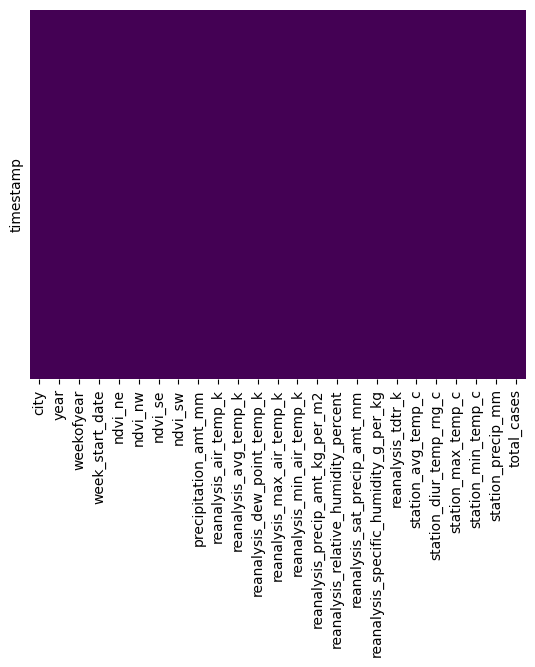

In [ ]:
sns.heatmap(df_interpolated.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handling Outliers

In [ ]:

df_cleaned = df_interpolated.copy()
columns = [ 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']


print("Old Shape: ", df_cleaned.shape)

for column in columns:
    # Calculate quartiles
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df_cleaned[column] >= upper_bound)[0]
    lower_array = np.where(df_cleaned[column] <= lower_bound)[0]



    if len(upper_array) > 0:
        df_cleaned.drop(index=df_cleaned.index[upper_array], inplace=True)
    if len(lower_array) > 0:
        df_cleaned.drop(index=df_cleaned.index[lower_array], inplace=True)



print("New Shape: ", df_cleaned.shape)

Old Shape:  (1446, 25)
New Shape:  (848, 25)


 too much of the data were classed as outliers and model performance decreased after removing outliers, so we decided not remove the outliers

# data one hot encoding categorical varibale

In [ ]:
df = df_interpolated.copy()




df.reset_index(drop=True, inplace=True)
from sklearn.preprocessing import OneHotEncoder
#
encoder = OneHotEncoder(sparse_output=False)

#
one_hot_encoded = encoder.fit_transform(df[['city']])


one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['city']))


df_encoded = pd.concat([df, one_hot_df], axis=1)


df_encoded = df_encoded.drop(['city'], axis=1)

In [ ]:
df_encoded

year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0     1990          18      1990-04-30  0.122600  0.103725  0.198483   
1     1990          19      1990-05-07  0.169900  0.142175  0.162357   
2     1990          20      1990-05-14  0.032250  0.172967  0.157200   
3     1990          21      1990-05-21  0.128633  0.245067  0.227557   
4     1990          22      1990-05-28  0.196200  0.262200  0.251200   
...    ...         ...             ...       ...       ...       ...   
1441  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1442  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1443  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1444  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1445  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0     0.177617                 12.42             297.572857   
1     0.155486                 22.82             298.211429   
2     0.170843                 34.54             298.781429   
3     0.235886                 15.36             298.987143   
4     0.247340                  7.52             299.518571   
...        ...                   ...                    ...   
1441  0.292514                 55.30             299.334286   
1442  0.225657                 86.47             298.330000   
1443  0.233714                 58.94             296.598571   
1444  0.325486                 59.67             296.345714   
1445  0.315757                 63.22             298.097143   

      reanalysis_avg_temp_k  ...  reanalysis_specific_humidity_g_per_kg  \
0                297.742857  ...                              14.012857   
1                298.442857  ...                              15.372857   
2                298.878571  ...                              16.848571   
3                299.228571  ...                              16.672857   
4                299.664286  ...                              17.210000   
...                     ...  ...                                    ...   
1441             300.771429  ...                              18.485714   
1442             299.392857  ...                              18.070000   
1443             297.592857  ...                              17.008571   
1444             297.521429  ...                              16.815714   
1445             299.835714  ...                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286           28.942857                 9.371429   
...                 ...                 ...                      ...   
1441           9.800000           28.633333                11.933333   
1442           7.471429           27.433333                10.500000   
1443           7.500000           24.400000                 6.900000   
1444           7.871429           25.433333                 8.733333   
1445          11.014286           27.475000                 9.900000   

      station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  \
0                   29.4                20.0               16.0            4   
1                   31.7                22.2                8.6            5   
2                   32.2                22.8               41.4            4   
3                   33.3                23.3                4.0            3   
4                   35.0                23.9                5.8            6   
...                  ...                 ...                ...          ...   
1441                35.4                22.4              

dropping the other object data type week start date, as year and week of year repersents the same information

In [ ]:
newdf = df_encoded.drop("week_start_date", axis='columns')

In [ ]:
newdf

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0     1990          18  0.122600  0.103725  0.198483  0.177617   
1     1990          19  0.169900  0.142175  0.162357  0.155486   
2     1990          20  0.032250  0.172967  0.157200  0.170843   
3     1990          21  0.128633  0.245067  0.227557  0.235886   
4     1990          22  0.196200  0.262200  0.251200  0.247340   
...    ...         ...       ...       ...       ...       ...   
1441  2010          21  0.342750  0.318900  0.256343  0.292514   
1442  2010          22  0.160157  0.160371  0.136043  0.225657   
1443  2010          23  0.247057  0.146057  0.250357  0.233714   
1444  2010          24  0.333914  0.245771  0.278886  0.325486   
1445  2010          25  0.298186  0.232971  0.274214  0.315757   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                    12.42             297.572857             297.742857   
1                    22.82             298.211429             298.442857   
2                    34.54             298.781429             298.878571   
3                    15.36             298.987143             299.228571   
4                     7.52             299.518571             299.664286   
...                    ...                    ...                    ...   
1441                 55.30             299.334286             300.771429   
1442                 86.47             298.330000             299.392857   
1443                 58.94             296.598571             297.592857   
1444                 59.67             296.345714             297.521429   
1445                 63.22             298.097143             299.835714   

      reanalysis_dew_point_temp_k  ...  reanalysis_specific_humidity_g_per_kg  \
0                      292.414286  ...                              14.012857   
1                      293.951429  ...                              15.372857   
2                      295.434286  ...                              16.848571   
3                      295.310000  ...                              16.672857   
4                      295.821429  ...                              17.210000   
...                           ...  ...                                    ...   
1441                   296.825714  ...                              18.485714   
1442                   296.452857  ...                              18.070000   
1443                   295.501429  ...                              17.008571   
1444                   295.324286  ...                              16.815714   
1445                   295.807143  ...                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286           28.942857                 9.371429   
...                 ...                 ...                      ...   
1441           9.800000           28.633333                11.933333   
1442           7.471429           27.433333                10.500000   
1443           7.500000           24.400000                 6.900000   
1444           7.871429           25.433333                 8.733333   
1445          11.014286           27.475000                 9.900000   

      station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  \
0                   29.4                20.0               16.0            4   
1                   31.7                22.2                8.6            5   
2                   32.2                22.8               41.4            4   
3                   33.3                23.3                4.0            3   
4                   35.0                23.9                5.

In [ ]:
#move column 'total_cases' to the end
newdf = newdf[[col for col in newdf.columns if col != 'total_cases'] + ['total_cases']]

In [ ]:
newdf

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0     1990          18  0.122600  0.103725  0.198483  0.177617   
1     1990          19  0.169900  0.142175  0.162357  0.155486   
2     1990          20  0.032250  0.172967  0.157200  0.170843   
3     1990          21  0.128633  0.245067  0.227557  0.235886   
4     1990          22  0.196200  0.262200  0.251200  0.247340   
...    ...         ...       ...       ...       ...       ...   
1441  2010          21  0.342750  0.318900  0.256343  0.292514   
1442  2010          22  0.160157  0.160371  0.136043  0.225657   
1443  2010          23  0.247057  0.146057  0.250357  0.233714   
1444  2010          24  0.333914  0.245771  0.278886  0.325486   
1445  2010          25  0.298186  0.232971  0.274214  0.315757   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                    12.42             297.572857             297.742857   
1                    22.82             298.211429             298.442857   
2                    34.54             298.781429             298.878571   
3                    15.36             298.987143             299.228571   
4                     7.52             299.518571             299.664286   
...                    ...                    ...                    ...   
1441                 55.30             299.334286             300.771429   
1442                 86.47             298.330000             299.392857   
1443                 58.94             296.598571             297.592857   
1444                 59.67             296.345714             297.521429   
1445                 63.22             298.097143             299.835714   

      reanalysis_dew_point_temp_k  ...  reanalysis_specific_humidity_g_per_kg  \
0                      292.414286  ...                              14.012857   
1                      293.951429  ...                              15.372857   
2                      295.434286  ...                              16.848571   
3                      295.310000  ...                              16.672857   
4                      295.821429  ...                              17.210000   
...                           ...  ...                                    ...   
1441                   296.825714  ...                              18.485714   
1442                   296.452857  ...                              18.070000   
1443                   295.501429  ...                              17.008571   
1444                   295.324286  ...                              16.815714   
1445                   295.807143  ...                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286           28.942857                 9.371429   
...                 ...                 ...                      ...   
1441           9.800000           28.633333                11.933333   
1442           7.471429           27.433333                10.500000   
1443           7.500000           24.400000                 6.900000   
1444           7.871429           25.433333                 8.733333   
1445          11.014286           27.475000                 9.900000   

      station_max_temp_c  station_min_temp_c  station_precip_mm  city_iq  \
0                   29.4                20.0               16.0      0.0   
1                   31.7                22.2                8.6      0.0   
2                   32.2                22.8               41.4      0.0   
3                   33.3                23.3                4.0      0.0   
4                   35.0                23.9                5.8      0.0   
...   

spliting features and target variable

In [ ]:
X = newdf.iloc[:, :-1]
y = newdf.iloc[:, -1]

In [ ]:
X

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0     1990          18  0.122600  0.103725  0.198483  0.177617   
1     1990          19  0.169900  0.142175  0.162357  0.155486   
2     1990          20  0.032250  0.172967  0.157200  0.170843   
3     1990          21  0.128633  0.245067  0.227557  0.235886   
4     1990          22  0.196200  0.262200  0.251200  0.247340   
...    ...         ...       ...       ...       ...       ...   
1441  2010          21  0.342750  0.318900  0.256343  0.292514   
1442  2010          22  0.160157  0.160371  0.136043  0.225657   
1443  2010          23  0.247057  0.146057  0.250357  0.233714   
1444  2010          24  0.333914  0.245771  0.278886  0.325486   
1445  2010          25  0.298186  0.232971  0.274214  0.315757   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                    12.42             297.572857             297.742857   
1                    22.82             298.211429             298.442857   
2                    34.54             298.781429             298.878571   
3                    15.36             298.987143             299.228571   
4                     7.52             299.518571             299.664286   
...                    ...                    ...                    ...   
1441                 55.30             299.334286             300.771429   
1442                 86.47             298.330000             299.392857   
1443                 58.94             296.598571             297.592857   
1444                 59.67             296.345714             297.521429   
1445                 63.22             298.097143             299.835714   

      reanalysis_dew_point_temp_k  ...  reanalysis_sat_precip_amt_mm  \
0                      292.414286  ...                         12.42   
1                      293.951429  ...                         22.82   
2                      295.434286  ...                         34.54   
3                      295.310000  ...                         15.36   
4                      295.821429  ...                          7.52   
...                           ...  ...                           ...   
1441                   296.825714  ...                         55.30   
1442                   296.452857  ...                         86.47   
1443                   295.501429  ...                         58.94   
1444                   295.324286  ...                         59.67   
1445                   295.807143  ...                         63.22   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                                 14.012857           2.628571   
1                                 15.372857           2.371429   
2                                 16.848571           2.300000   
3                                 16.672857           2.428571   
4                                 17.210000           3.014286   
...                                     ...                ...   
1441                              18.485714           9.800000   
1442                              18.070000           7.471429   
1443                              17.008571           7.500000   
1444                              16.815714           7.871429   
1445                              17.355714          11.014286   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0              25.442857                 6.900000                29.4   
1              26.714286                 6.371429                31.7   
2              26.714286                 6.485714                32.2   
3              27.471429                 6.771429                33.3   
4              28.942857                 9.371429                35.0   
...                  ...                      ...                 ...   
1441           28.633333                11.933333                35.4   
1442           27.433333                10.500000         

In [ ]:
y

0       4
1       5
2       4
3       3
4       6
       ..
1441    5
1442    8
1443    1
1444    1
1445    4
Name: total_cases, Length: 1446, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature selection

In [ ]:
corrmatrix = X_train.corr()

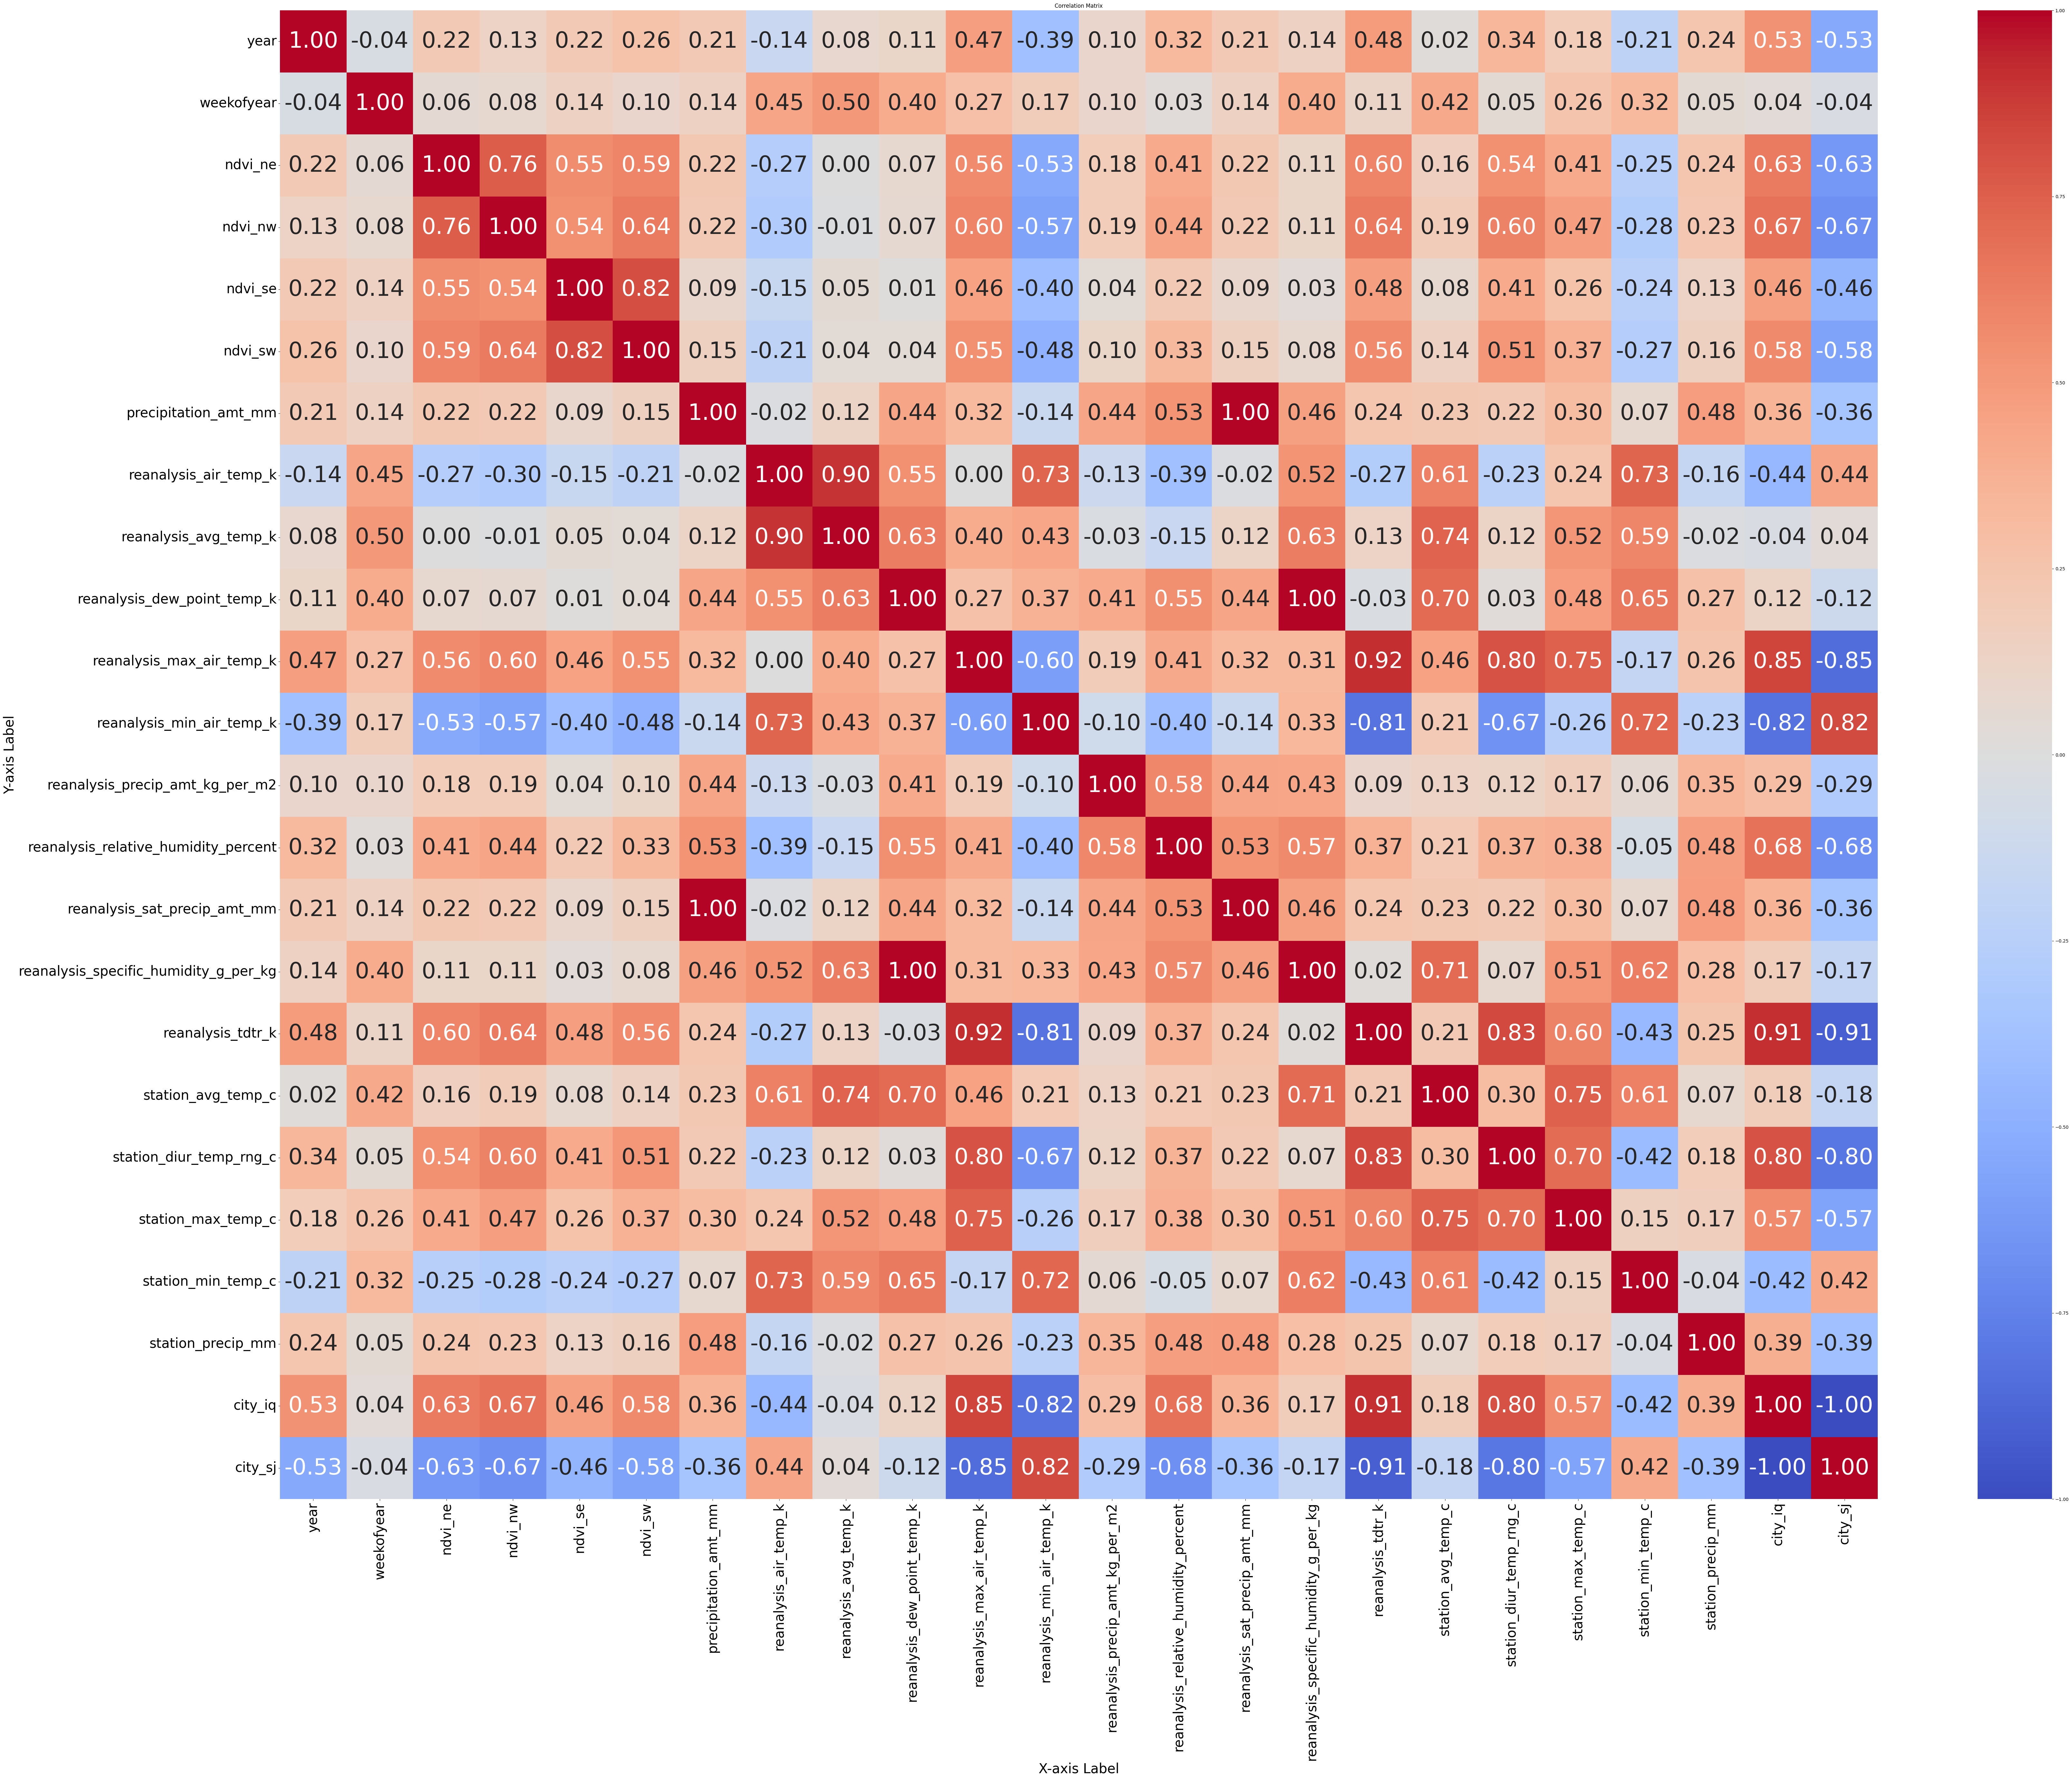

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 60))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 50})
plt.title("Correlation Matrix")
plt.xlabel('X-axis Label', fontsize=30)
plt.ylabel('Y-axis Label', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [ ]:
# Set correlation threshold
threshold = 0.7  # Adjust based on problem

# Find and drop highly correlated features
correlated_features = set()
for i in range(len(corrmatrix.columns)):
    for j in range(i):
        if abs(corrmatrix.iloc[i, j]) > threshold:
            colname = corrmatrix.columns[i]
            correlated_features.add(colname)



#df_filtered = newdf.drop(columns=correlated_features)

# Display filtered DataFrame
#print("DataFrame after feature selection:")
#print(df_filtered)


In [ ]:
correlated_features

{'city_iq',
 'city_sj',
 'ndvi_nw',
 'ndvi_sw',
 'reanalysis_avg_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c'}

In [ ]:
X_train.shape, X_test.shape

((968, 24), (478, 24))

In [ ]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
X_test.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
X_train.shape, X_test.shape

((968, 11), (478, 11))

In [ ]:
X_train.head()

year  weekofyear   ndvi_ne   ndvi_se  precipitation_amt_mm  \
506  2000           7  0.193167  0.163271                  0.00   
811  2006           2 -0.042450  0.259271                 72.69   
918  2008           6 -0.111700  0.232843                  0.00   
910  2007          50 -0.133050  0.151440                 31.30   
236  1994          47  0.180736  0.174584                 11.16   

     reanalysis_air_temp_k  reanalysis_dew_point_temp_k  \
506             297.745714                   293.250000   
811             298.332857                   293.108571   
918             297.237143                   291.537143   
910             298.900000                   294.774286   
236             299.422857                   296.377143   

     reanalysis_max_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
506                      299.9                             3.10   
811                      300.1                            10.90   
918                      299.3                            19.70   
910                      300.9                            66.72   
236                      301.9                            23.70   

     reanalysis_relative_humidity_percent  station_precip_mm  
506                             76.117143                3.8  
811                             72.928571               21.9  
918                             70.642857               35.9  
910                             78.015714               30.2  
236                             83.502857               49.3

In [ ]:
X_test.head()

year  weekofyear   ndvi_ne   ndvi_se  precipitation_amt_mm  \
413   1998          18  0.106300  0.219186                 71.64   
316   1996          24  0.098600  0.123750                 27.82   
554   2001           4  0.041100  0.218471                  0.00   
65    1991          31  0.076625  0.190643                 48.41   
1380  2009          12  0.157883  0.213729                106.68   

      reanalysis_air_temp_k  reanalysis_dew_point_temp_k  \
413              299.565714                   295.834286   
316              298.742857                   295.438571   
554              298.017143                   293.358571   
65               299.852857                   296.478571   
1380             297.365714                   296.500000   

      reanalysis_max_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
413                       301.5                            11.70   
316                       300.6                            43.30   
554                       299.9                            10.24   
65                        302.0                            34.39   
1380                      304.6                            66.83   

      reanalysis_relative_humidity_percent  station_precip_mm  
413                              80.072857               16.3  
316                              82.235714               40.9  
554                              75.380000               31.5  
65                               81.897143               18.0  
1380                             95.708571               14.3

# Scaling features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
scaler = StandardScaler().fit(X_test)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.17644575, -1.27094673,  0.35321287, ..., -0.8469795 ,
        -0.83694988, -0.73343836],
       [ 0.92312174, -1.6015951 , -1.32939583, ..., -0.66390128,
        -1.28884302, -0.36643226],
       [ 1.28964424, -1.3370764 , -1.82393061, ..., -0.45735149,
        -1.61278077, -0.08256013],
       ...,
       [ 1.10638299,  0.18390607,  1.17010863, ...,  0.00785497,
         1.73248379, -0.34615568],
       [ 0.92312174,  1.63875888, -1.41759084, ..., -0.57940364,
        -0.96126098, -0.26504936],
       [ 0.55659925, -0.67577967,  0.71755468, ...,  0.36861296,
         1.45936378, -0.06228355]])

In [ ]:
X_test_scaled

array([[-0.5960786 , -0.62739155, -0.30246394, ..., -0.67635178,
        -0.32336535, -0.49865508],
       [-0.97421473, -0.21231451, -0.36076204, ...,  0.02648915,
        -0.02840525,  0.0760541 ],
       [-0.02887441, -1.59590464, -0.796105  , ..., -0.70882481,
        -0.96335472, -0.14355022],
       ...,
       [ 0.72739784,  0.54866006,  2.35148741, ..., -0.69192104,
        -0.38142222, -0.01505833],
       [-0.97421473, -1.73426366,  0.03924848, ..., -0.72928727,
        -0.42584157, -0.30474914],
       [-0.02887441,  0.41030105,  1.02909041, ..., -0.93658086,
        -1.76855291, -0.4589394 ]])

# Modelling

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter tuning

In [ ]:
svr = SVR()
from sklearn.pipeline import Pipeline


pipeline = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ( 'model', svr)
])


from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__C': [1, 10, 20],
    'model__epsilon': [0.1, 0.2, 0.5],
}


reg = GridSearchCV(pipeline,param_grid, cv=5, return_train_score=False, scoring = 'neg_mean_squared_error')
reg.fit(X_train, y_train)
reg.best_score_
reg.best_params_



{'model__C': 20, 'model__epsilon': 0.1, 'model__kernel': 'rbf'}

In [ ]:
reg.best_score_

-1607.5990900022414

In [ ]:
#hyper parameter tuning linear regression model
lr = LinearRegression()

pipeline = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ( 'model', lr)
])


param_grid = {'model__fit_intercept': [True, False],
              'model__copy_X': [True, False],
              'model__positive': [True, False]}

reg = GridSearchCV(pipeline,param_grid, cv=5, return_train_score=False, scoring= 'neg_mean_squared_error')
reg.fit(X_train , y_train)
reg.best_score_
reg.best_params_

{'model__copy_X': True, 'model__fit_intercept': True, 'model__positive': False}

In [ ]:
reg.best_score_

-1644.630498052516

In [ ]:
rfr = RandomForestRegressor()


pipeline = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ( 'model', rfr )
])
param_grid = {
    'model__n_estimators': [25, 50, 100],
    'model__criterion': ['squared_error', 'absolute_error'],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 4, 8],
    'model__min_samples_leaf': [1, 2, 4],

}

reg = GridSearchCV(pipeline,param_grid, cv=5, return_train_score=False, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)
reg.best_score_
reg.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 20,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 50}

In [ ]:
reg.best_score_

-742.8411221319789

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()

pipeline = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ( 'model', reg )
])


param_grid = {
    'model__loss': ['squared_error','absolute_error'],
    'model__n_estimators': [100,150,200],
    'model__criterion': ['squared_error', 'friedman_mse'],
    'model__max_depth': [None,3],
    'model__min_samples_split': [2, 4, 8],
    'model__min_samples_leaf': [1, 2, 4],

}

reg = GridSearchCV(pipeline,param_grid, cv=5, return_train_score=False, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)
reg.best_score_
reg.best_params_

{'model__criterion': 'friedman_mse',
 'model__loss': 'squared_error',
 'model__max_depth': 3,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 4,
 'model__n_estimators': 200}

In [ ]:
reg.best_score_

-631.3385278698868

evaluating

In [ ]:
# SVR model for regrssion





svr = SVR(C= 20, epsilon= 0.1, kernel='rbf')
svr.fit(X_train_scaled , y_train)
y_pred = svr.predict(X_test_scaled)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))




mean squared error:1540.51
mean absolute error:15.65


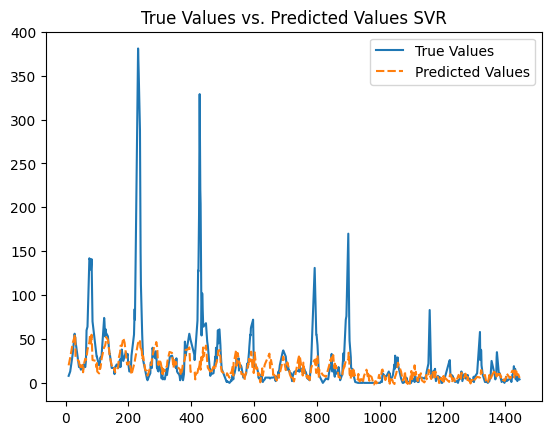

In [71]:
# Create a dataframe for seaborn
data = {'True Values': y_test, 'Predicted Values': y_pred}
df = pd.DataFrame(data)

# Line plot
sns.lineplot(data=df)
plt.title('True Values vs. Predicted Values SVR')
plt.show()


In [77]:
#random forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,criterion="squared_error",max_depth=20,min_samples_split=4,min_samples_leaf=2)

regressor = RandomForestRegressor(n_estimators=23,max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,criterion='friedman_mse')
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))





mean squared error:1014.43
mean absolute error:15.12


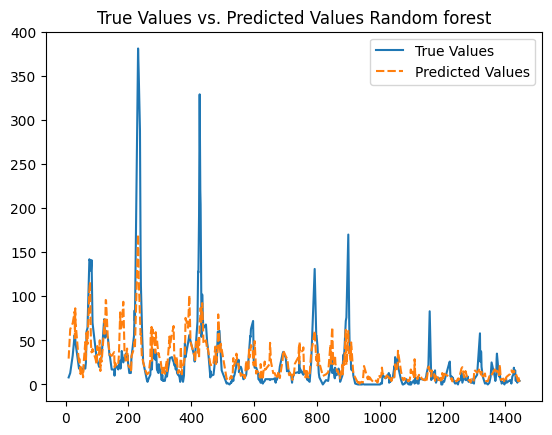

In [78]:
# Create a dataframe for seaborn
data = {'True Values': y_test, 'Predicted Values': y_pred}
df = pd.DataFrame(data)

# Line plot
sns.lineplot(data=df)
plt.title('True Values vs. Predicted Values Random forest')
plt.show()


In [81]:
#linear regression model
reg = LinearRegression(fit_intercept=True,copy_X=True,positive=False)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))





mean squared error:1492.91
mean absolute error:20.21


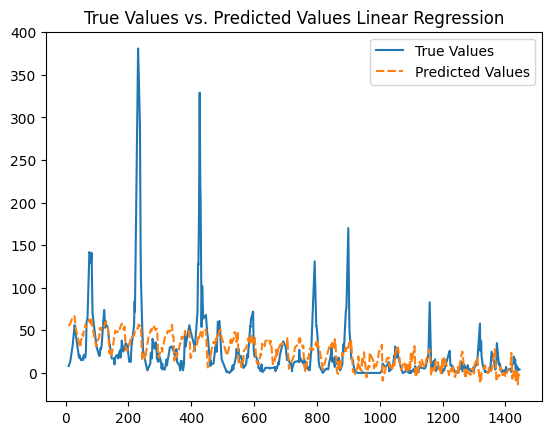

In [82]:
# Create a dataframe for seaborn
data = {'True Values': y_test, 'Predicted Values': y_pred}
df = pd.DataFrame(data)

# Line plot
sns.lineplot(data=df)
plt.title('True Values vs. Predicted Values Linear Regression')
plt.show()


In [84]:
#gbr model
reg = GradientBoostingRegressor(loss='squared_error',n_estimators=200,criterion="friedman_mse",max_depth=3,min_samples_split=4,min_samples_leaf=4)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))
print('The R-square is: ', r2_score(y_test,y_pred))



mean squared error:634.86
mean absolute error:12.75
The R-square is:  0.6545862011127697


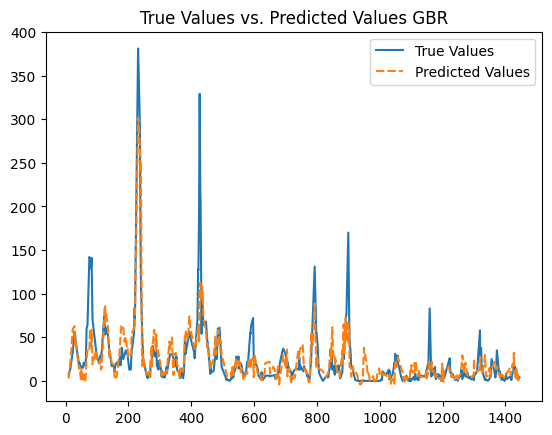

In [85]:
# Create a dataframe for seaborn
data = {'True Values': y_test, 'Predicted Values': y_pred}
df = pd.DataFrame(data)

# Line plot
sns.lineplot(data=df)
plt.title('True Values vs. Predicted Values GBR')
plt.show()
